In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import random as rd

In [ ]:
# load dataset
mnist = fetch_openml('mnist_784')

In [ ]:
# m_train=trainingX.shape[0]
# m_test=testingX.shape[0]

# print(m_train)
# print(m_test)
# trainX=trainingX.reshape(m_train,-1).T
# trainX=trainX/225
# trainY=trainingY.reshape(m_train,-1).T
# testX=testingX.reshape(m_test,-1).T
# testX=testX/255
# testY=testingY.reshape(m_test,-1).T
# print(trainY.shape)
# print(trainX.shape)

In [ ]:
# split into inputs and outputs
X,Y = mnist['data'],mnist['target']
print(Y.shape)
print(X.shape, Y.shape)

# split into train test sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.33, random_state=1)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)
trainY = trainY.astype(np.int8)
testY = trainY.astype(np.int8)
print(trainY.shape)

# plt.imshow(trainY[2600])

# print(trainY)

(70000,)
(70000, 784) (70000,)
(46900, 784) (23100, 784) (46900,) (23100,)
(46900,)


In [ ]:
# y[26000]
trainX = trainX.T
testX = testX.T
trainY = trainY.T
print(trainX.shape)
# one_hot_encoder(trainY)
m_train = trainX.shape[1]
# trainY=trainY.reshape(m_train,-1).T

# y=np.zeros((10,46900))
trainY=trainY.reshape(1,46900)
print(trainY.shape)
# print(trainY[0])
# #converting y into a one-hot-vector
# for i in range(46900):
#   y[trainY[i]][i]=1.0
# print(y.shape)


(784, 46900)
(1, 46900)


In [ ]:
# # print(Y.shape)
def one_hot_encoder(Y):
    one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
Y=one_hot_encoder(trainY)
print(Y.shape)

(10, 46900)


In [ ]:
# def one_hot_vector(Y):
#     y_hot=np.zeros((10,46900))
#     for i in range(46900):
#         y_hot[Y[i]][i]=1.0
#     return y_hot
# y=one_hot_vector(trainY)
# print(y.shape)

In [ ]:
# trainY = one_hot_encoder(trainY)
# print(trainY.shape)

In [ ]:
layer=[784,330,140,10] 
print(len(layer))

4


In [ ]:
def init_parameters(layer):
    parameters={}
    for l in range(1,len(layer)):
        parameters['W' + str(l)] = np.random.randn(layer[l], layer[l-1]) * 0.01
        # print(parameters["W"+str(l)].shape)
        parameters['b' + str(l)] = np.zeros((layer[l], 1))

    return parameters

In [ ]:
parameters=init_parameters(layer)
# print("W1 =  "+str(parameters['W1']))
print(parameters.keys())
print(trainX.shape[0])

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
784


In [ ]:
# activation functions
def softmax(Z):
    exp_el = np.exp(Z-Z.max()) #storing e^Z in temp variable exp_el
    A = exp_el/np.sum(exp_el,axis=0)
    # print('Softmax AL')
    # print(A.max())
    return A

def relu(Z):
    A = np.maximum(0,Z)
    assert (A.shape == Z.shape)
    return A

In [ ]:
# def softmax_back(da, cur_cache):
#     Z = cur_cache
#     exp_el = np.exp(Z-Z.max())
#     dZ = exp_el/np.sum(exp_el,axis=0)*(1-exp_el/np.sum(exp_el,axis=0))
#     assert (dZ.shape == Z.shape)
#     return dZ

def relu_back(Z,dA_prev):

    # # for negative values it returns zero, while for positive values it returns the input value
    # dZ = int(Z>0) * Z
    relu_b= (1*(Z>0))
    relu_b=relu_b*dA_prev
    return relu_b

In [ ]:
#FORWARD PROPAGATION
# z=wX+b
# A=relu(z)
# cache=(A,Z)-->layer wise stored
def forward1(A,W,b):
    # print(W.shape)
    Z = np.dot(W,A)+b
    return Z

def forward_prop(X,parameters):
    cache={}
    L= len(parameters)//2 
    A_prev=X
    cache['A0']=X
    for l in range(1,L):
        Z = forward1(A_prev,parameters['W'+str(l)],parameters['b'+str(l)])
        A = relu(Z)
        cache['A'+str(l)] = A
        cache['Z'+str(l)] = Z
        A_prev = A
        # print(l,A_prev.shape)

    Z = forward1(A_prev,parameters['W'+str(L)],parameters['b'+str(L)])
    cache["Z"+str(L)] = Z
    AL = softmax(Z)
    cache['A'+str(L)]=AL
    return AL,cache


In [ ]:
AL,cache=forward_prop(trainX,parameters)
for l in range(len(layer)-1):
    print(l,cache['A'+str(l)].shape)

0 (784, 46900)
1 (330, 46900)
2 (140, 46900)


In [ ]:
def calc_cost(AL, Y):
    m = Y.shape[1]
    # Compute loss from aL and y.
    # loss = -np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T)
    buffer=1e-10
    loss = -1*(Y*np.log(AL+buffer))
    cost = (1./m) * np.sum(loss)
    
    cost = np.squeeze(cost)      # turns [[17]] into 17
    assert(cost.shape == ())
    
    return cost

In [ ]:
# BACKWARD PROPAGATION
def backward1(dZ,   A_prev, W, b):
    m = A_prev.shape[1]
    # print(dZ.shape," ",A_prev.shape)
    dW = 1.0/m * np.dot(dZ,A_prev.T)
    db = 1.0/m * np.sum(dZ, axis = 1, keepdims = True)
    # print(W.shape,dZ.shape)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def backward_prop(Y,AL,cache,parameters):

    L= len(parameters) // 2
    # print(L)
    m = AL.shape[1]
    grads={}
    for i in reversed(range(1,L+1)):
      if i==L:
        dz=AL-Y
      else:
        dz=relu_back(cache['Z'+str(i)],dA_prev)
      
      dA_prev,dW,db= backward1(dz, cache['A'+str(i-1)], parameters['W'+str(i)], parameters['b'+str(i)])
      grads["dW" + str(i)] = dW
      grads["db" + str(i)] = db
        
    return grads

In [ ]:
AL,cache= forward_prop(trainX,parameters)
gradient = backward_prop(trainY,AL,cache,parameters)
print(gradient.keys())
# print(gradient)

dict_keys(['dW3', 'db3', 'dW2', 'db2', 'dW1', 'db1'])


In [ ]:
def update_parameters(parameters, grads, alpha):
    
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - alpha * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - alpha * grads["db" + str(l+1)]
        
    return parameters

In [ ]:
# def predict(AL,Y):
#     amax = np.argmax(AL,axis=0)
#     ans = (amax==Y).mean()

#     # ans = 100 - np.mean(np.abs(AL - Y))
#     return ans

In [ ]:
def model(X, Y, layer, alpha, iters):

    costs = []                            
    parameters = init_parameters(layer)
    accuracy=[]
    # Loop (gradient descent)
    for i in range(0, iters+1):
        # print(i)
        #forward prop
        # print('FP')
        AL,cache = forward_prop(X,parameters)
        cost = calc_cost(AL,Y)
        costs.append(cost)
        #backward prop
        # print('BP')
        grads = backward_prop(Y,AL,cache,parameters) #calculate gradients
        parameters=update_parameters(parameters,grads,alpha)

        # print ("Cost after iteration %i: %f" %(i, cost))
        if i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
           # print('Accuracy: ',accuracy[i])
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per 10)')
            plt.title("Learning rate =" + str(alpha))
            plt.show()
            #costs.append(cost)

    return parameters

Cost after iteration 0: 2.312004


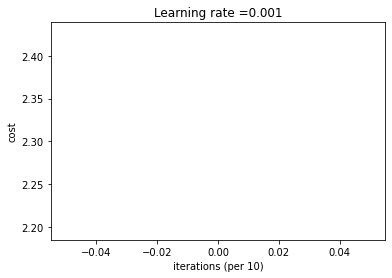

Cost after iteration 10: 2.178825


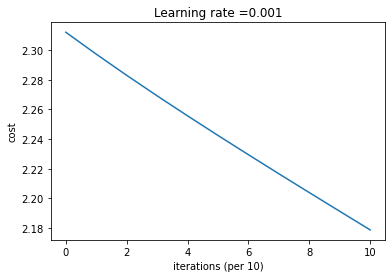

Cost after iteration 20: 2.049626


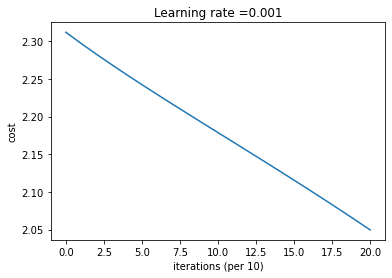

Cost after iteration 30: 1.901336


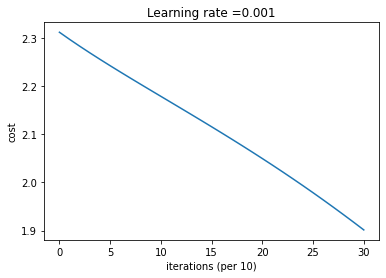

Cost after iteration 40: 1.727770


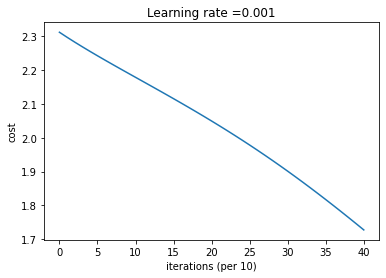

Cost after iteration 50: 1.537265


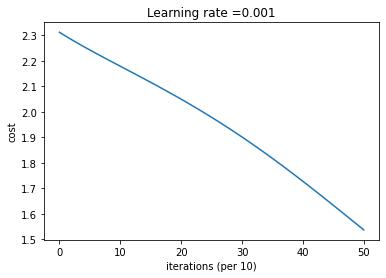

Cost after iteration 60: 1.347672


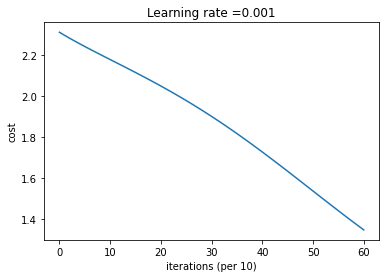

Cost after iteration 70: 1.176986


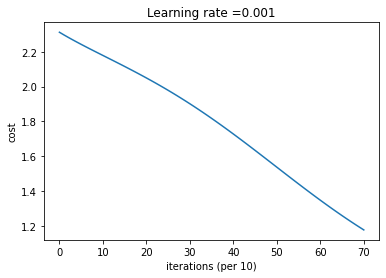

Cost after iteration 80: 1.034860


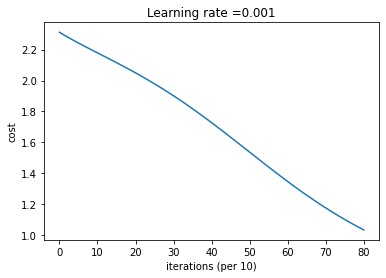

Cost after iteration 90: 0.921643


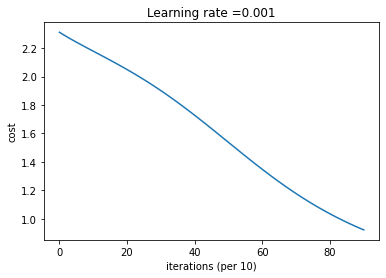

Cost after iteration 100: 0.832808


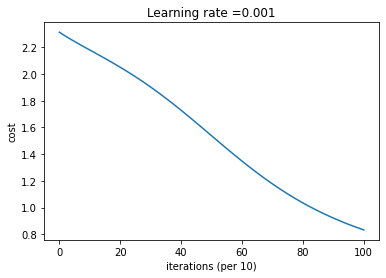

Cost after iteration 110: 0.762894


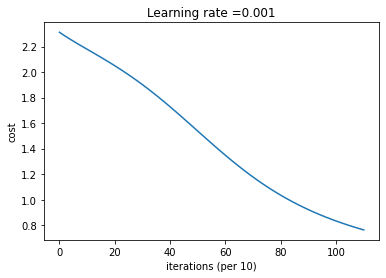

Cost after iteration 120: 0.707126


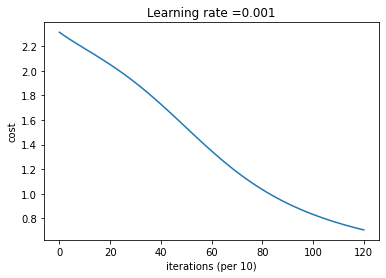

Cost after iteration 130: 0.661879


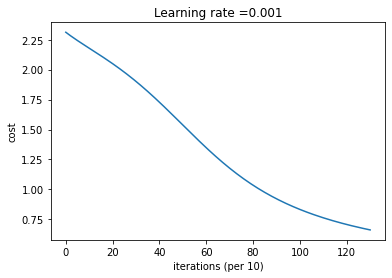

Cost after iteration 140: 0.624504


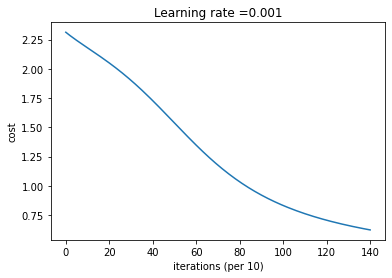

Cost after iteration 150: 0.593100


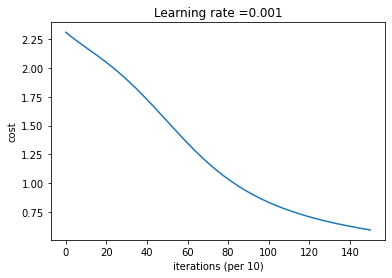

Cost after iteration 160: 0.566338


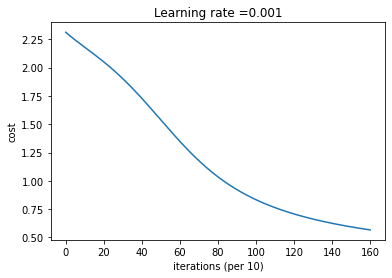

Cost after iteration 170: 0.543246


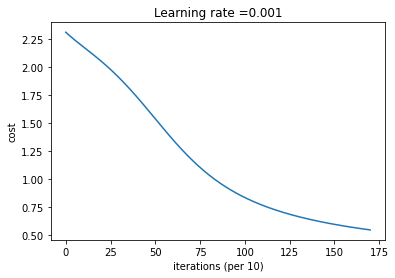

Cost after iteration 180: 0.523106


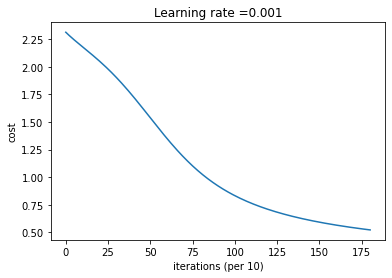

Cost after iteration 190: 0.505377


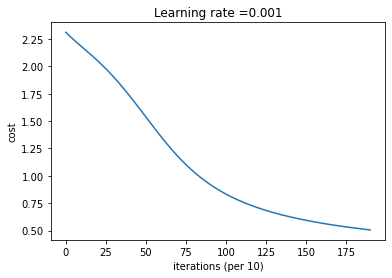

Cost after iteration 200: 0.489645


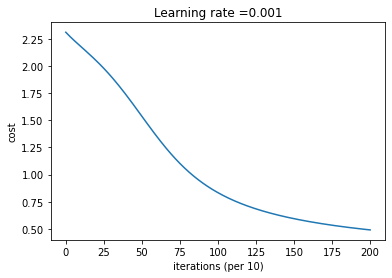

Cost after iteration 210: 0.475591


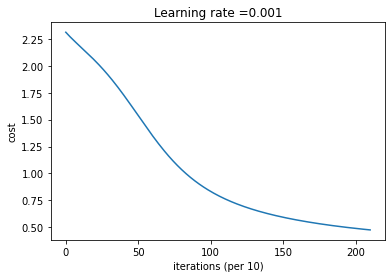

Cost after iteration 220: 0.462961


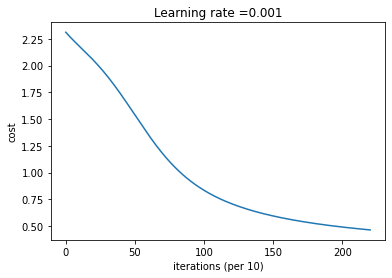

Cost after iteration 230: 0.451548


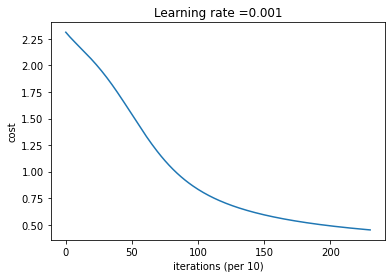

Cost after iteration 240: 0.441183


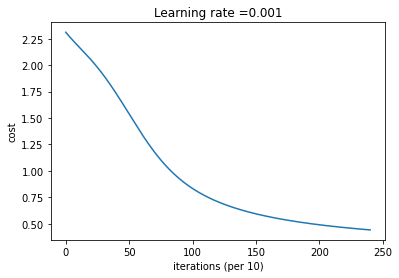

Cost after iteration 250: 0.431728


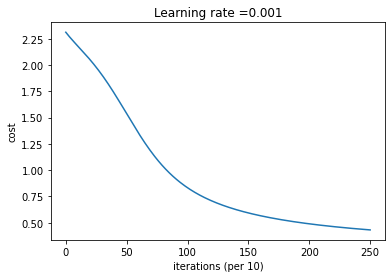

Cost after iteration 260: 0.423063


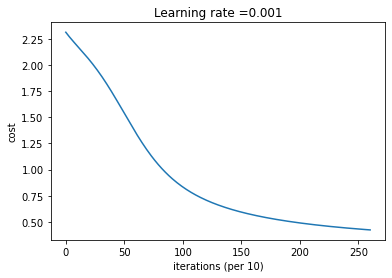

Cost after iteration 270: 0.415091


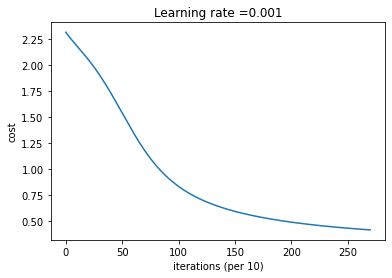

Cost after iteration 280: 0.407728


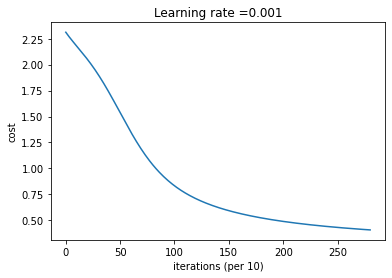

Cost after iteration 290: 0.400903


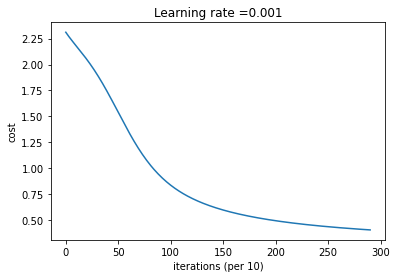

Cost after iteration 300: 0.394558


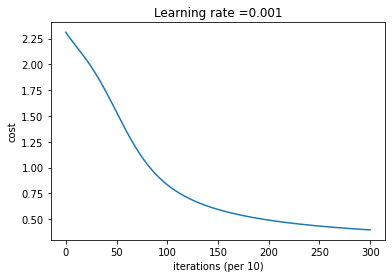

Cost after iteration 310: 0.388640


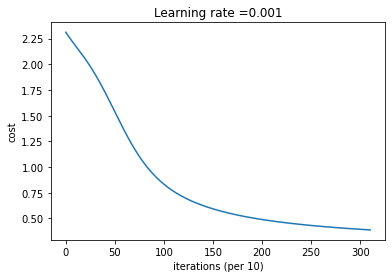

Cost after iteration 320: 0.383100


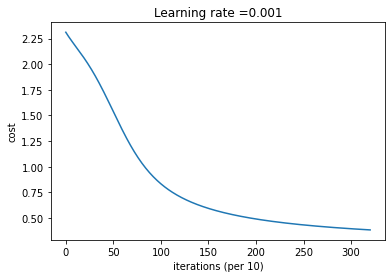

Cost after iteration 330: 0.377900


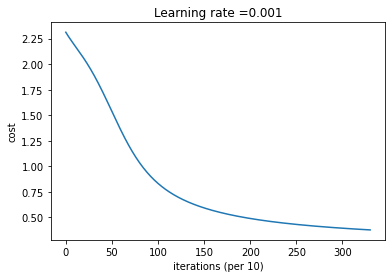

Cost after iteration 340: 0.373007


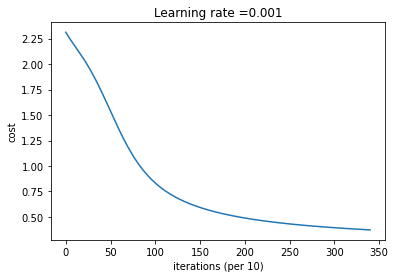

Cost after iteration 350: 0.368389


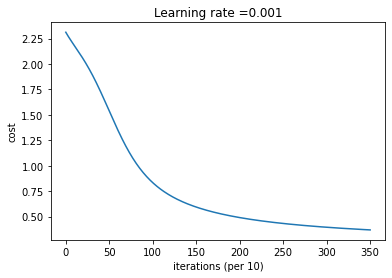

Cost after iteration 360: 0.364021


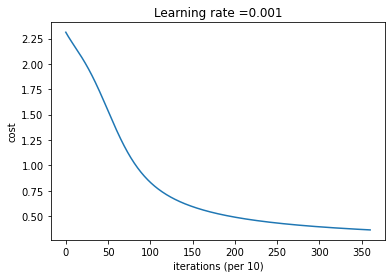

Cost after iteration 370: 0.359881


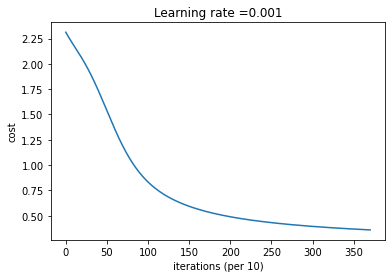

Cost after iteration 380: 0.355947


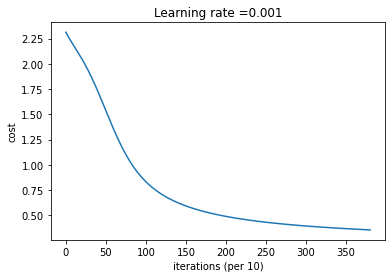

Cost after iteration 390: 0.352200


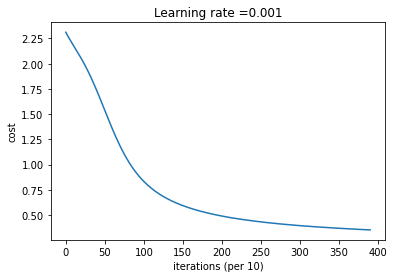

Cost after iteration 400: 0.348626


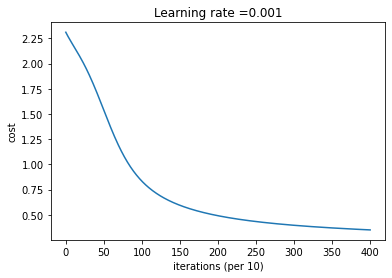

Cost after iteration 410: 0.345212


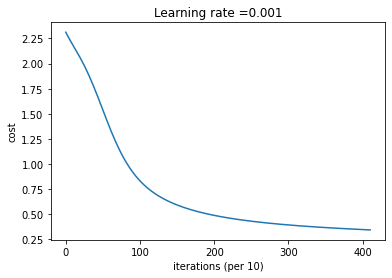

Cost after iteration 420: 0.341941


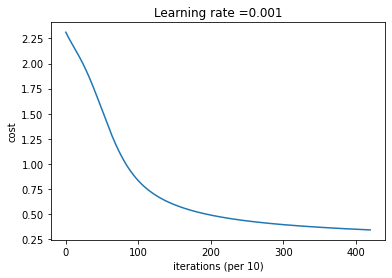

Cost after iteration 430: 0.338802


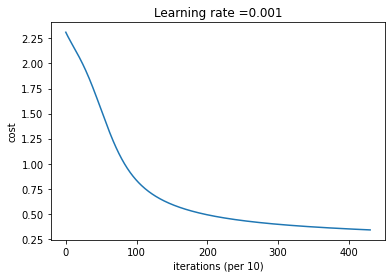

Cost after iteration 440: 0.335786


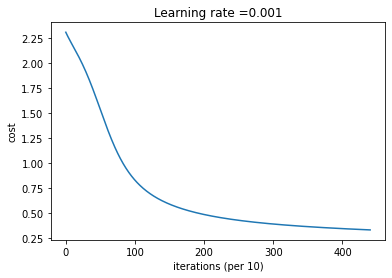

Cost after iteration 450: 0.332883


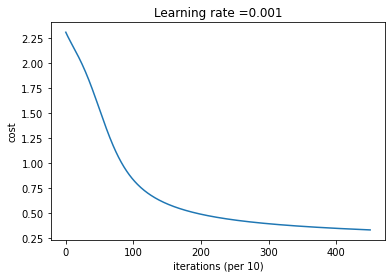

Cost after iteration 460: 0.330084


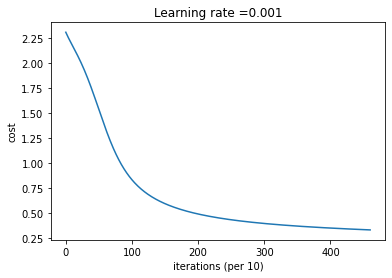

Cost after iteration 470: 0.327383


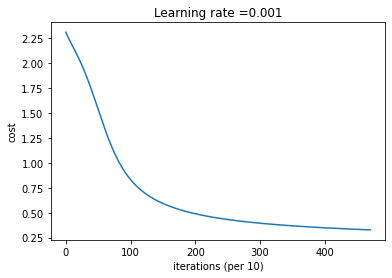

Cost after iteration 480: 0.324774


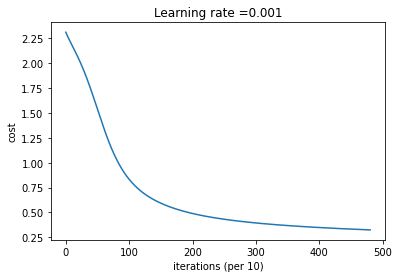

Cost after iteration 490: 0.322252


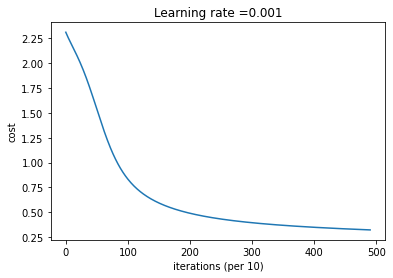

Cost after iteration 500: 0.319809


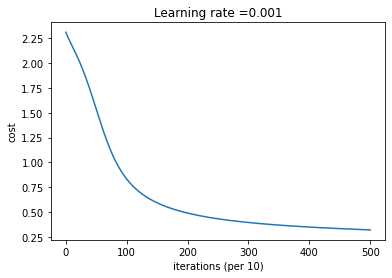

In [ ]:

para=model(trainX, Y, layer, 0.001, 500)

In [ ]:
def predict(x,y,para):
    m=x.shape[1]
    co=0
    al,c=forward_prop(x,para)
    
    pd=np.zeros((10,m))
    
    for i in range(m):
      n=np.argmax(al[:,i:i+1],axis=0)
      pd[n,i]=1.0
      if (np.array_equal(pd[:,i:i+1],y[:,i:i+1])):
        
        co+=1
  
    
    print("accuracy = ",(co/m)*100)
predict(trainX,y,para)


accuracy =  92.82515991471215


(784, 512)
(10, 512)
Cost after iteration 0: 2.309700


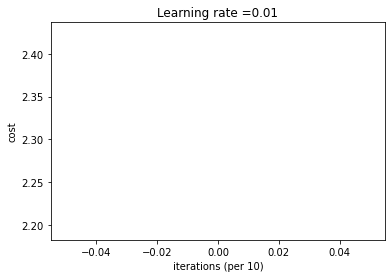

Cost after iteration 100: 0.020574


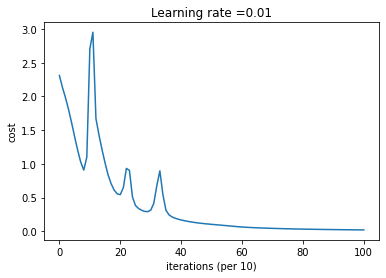

Cost after iteration 200: 0.006095


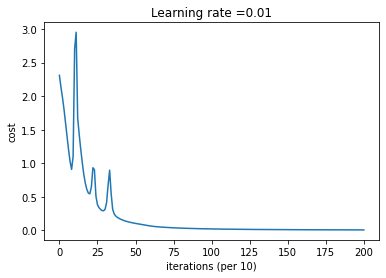

Cost after iteration 300: 0.003284


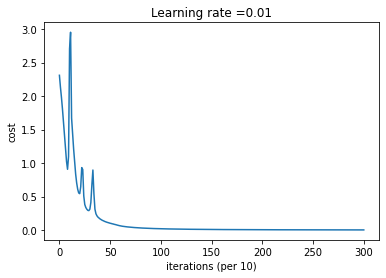

Cost after iteration 400: 0.002177


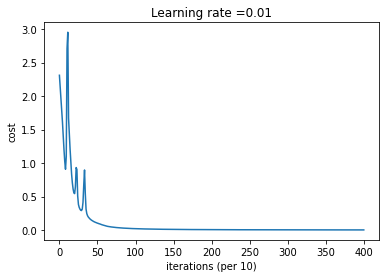

Cost after iteration 500: 0.001600


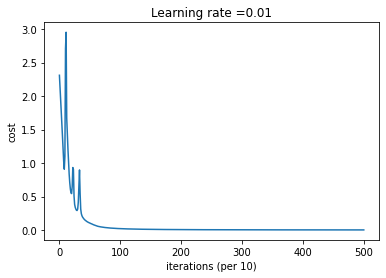

Cost after iteration 600: 0.001252


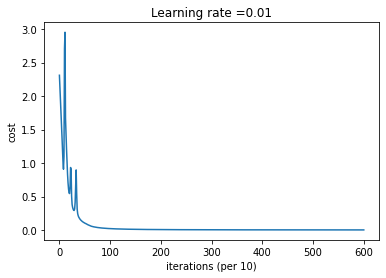

Cost after iteration 700: 0.001021


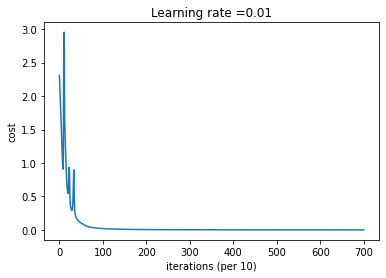

Cost after iteration 800: 0.000858


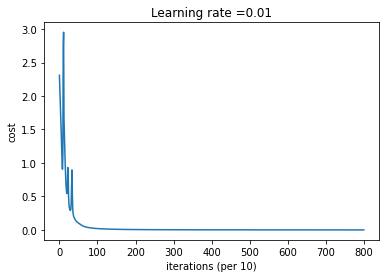

Cost after iteration 900: 0.000737


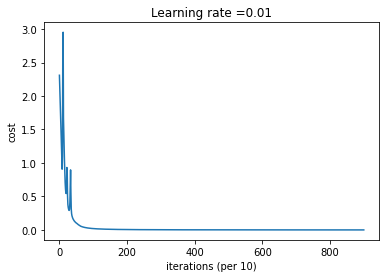

Cost after iteration 1000: 0.000644


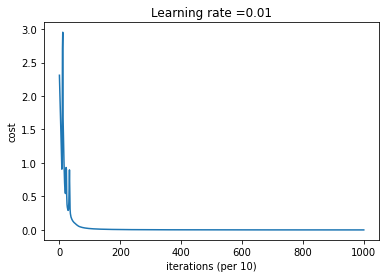

accuracy =  100.0
looks like  9


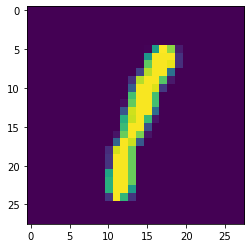

In [ ]:
x_mini={}
y_mini={}
batch=512
# y=one_hot_vector(testY)
for i in range(1000):
    x_mini['X'+str(i+1)]=trainX[:,batch*i:batch*i+batch]
    y_mini['Y'+str(i+1)]=y[:,batch*i:batch*i+batch]

layer=[784,330,140,10] 
parameters = init_parameters(layer)
print(x_mini['X1'].shape)
print(y_mini['Y1'].shape)
# y_mini['Y1']=one_hot_vector(train['Y1'])
paraf = model(x_mini['X1'], y_mini['Y1'], layer, 0.01, 1000)
# predict(x_mini['X1'],y_mini['Y1'],paraf)
i=np.random.randint(1,512)

digit=x_mini['X1'][:,i:i+1]
lab=y_mini['Y1'][:, i:i+1]
result,c=forward_prop(digit, parameters)
predict(digit,lab,paraf)
# print(result)
digit=digit.reshape(28,28)
plt.imshow(digit)
# print(lab)
print("looks like ", np.argmax(result))

In [ ]:
#discarded back prop
 # Y = Y.reshape(AL.shape)
    # # print('Y:',Y.shape)
    # grads={}
    # #last layer
    # # dAL = -1*(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    # # cur_cache = cache["Z"+str(L)]
    # # grads['dA'+str(L)]=dAL
    # # dZ = np.multiply(dAL,softmax_back(dAL,cur_cache))
    # # dZ = softmax_back(dAL,cur_cache)
    # # print('dZ: ',dZ.shape)
    # # print('AL: ',dAL.shape)
    # dZ = AL - Y
    # # print(dZ.shape)
    # al=L-2
    # A_prev= cache['A'+str(al)]
    # cur_cache = (A_prev, parameters['W'+str(L)], parameters['b'+str(L)])
    # grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward1(dZ,cur_cache)
    # dA_prev = grads["dA" + str(L-1)]

    # for l in range(L-1,0,-1): 
    #     # print(l)
    #     al-=1
    #     if al<0:
    #         A_prev= trainX
    #     else:
    #         A_prev = cache['A'+str(al)]
    #     cur_cache=cache['Z'+str(l)]
    #     dZ = np.multiply(grads["dA" + str(l)],relu_back(cur_cache)) #added now
    #     # dZ = 
    #     cur_cache=(A_prev, parameters['W'+str(l)], parameters['b'+str(l)])
    #     dA_prev, dW, db= backward1(dZ,cur_cache)
    #     # grads["dA" + str(l-1)] = dA_prev
    #     grads["dA" + str(l-1)] = dA_prev
    #     grads["dW" + str(l)] = dW
    #     grads["db" + str(l)] = db